In [258]:
import pandas as pd

import geopandas as gpd
import pickle
from pysal.lib import weights # import weight lib
import statsmodels as sm
from sklearn.model_selection import train_test_split
import seaborn as sns

# Detector data

In [11]:
UTD19 = pd.read_csv('Data/detectors_public.csv') # read big file with all cities 
newcitylist= [ 'munich', 'rotterdam', 'frankfurt', 'hamburg', 'zurich'] # find only our cities for now, store in dataframe
UTD19Cities = UTD19.loc[UTD19.citycode.isin(newcitylist)] # UTD19Cities is dataframe

# Assigning Flow

In [21]:
data_frankfurt = pd.read_csv('data\\UTD_f.csv')
data_hamburg = pd.read_csv('data/UTD_h.csv')
data_munich = pd.read_csv('data\\UTD_m.csv')
data_rotterdam = pd.read_csv('data\\UTD_r.csv')
data_zurich = pd.read_csv('data\\UTD_z.csv')

In [22]:
frankfurt_detid_average = (data_frankfurt.groupby('detid').flow.mean()).to_frame(name = None)
hamburg_detid_average = (data_hamburg.groupby('detid').flow.mean()).to_frame(name = None)
munich_detid_average = (data_munich.groupby('detid').flow.mean()).to_frame(name = None)
rotterdam_detid_average = (data_rotterdam.groupby('detid').flow.mean()).to_frame(name = None)
zurich_detid_average = (data_zurich.groupby('detid').flow.mean()).to_frame(name = None)

In [23]:
frankfurt_detid_average['city'] = 'frankfurt'
hamburg_detid_average['city'] = 'hamburg'
munich_detid_average['city'] = 'munich'
rotterdam_detid_average['city'] =  'rotterdam'
zurich_detid_average['city'] = 'zurich'

In [24]:
frankfurt_detid_average.reset_index(inplace = True)
hamburg_detid_average.reset_index(inplace = True)
munich_detid_average.reset_index(inplace = True)
rotterdam_detid_average.reset_index(inplace = True)
zurich_detid_average.reset_index(inplace = True)

munich_detid_average['detid'] = munich_detid_average.detid.apply(str)

In [25]:
def Match(detid, df):
    if type(detid) == str:
        flowval = df.loc[df.detid == detid, 'flow'].values # get specific value
        try:
            flowval = float(flowval) # convert array to float
            return flowval
        except:
            # list empty
            return np.nan

In [26]:
MeanFlowDict = {
    'frankfurt':frankfurt_detid_average,
    'hamburg': hamburg_detid_average,
    'munich': munich_detid_average,
    'rotterdam': rotterdam_detid_average,
    'zurich': zurich_detid_average
}
MeanFlowDict['munich']

,detid,flow,city
0,4000011,243.825830,munich
1,4000012,217.739685,munich
2,4000013,216.527538,munich
3,4000014,187.267434,munich
4,4001011,208.219033,munich
...,...,...,...
515,11273001,187.943665,munich
516,11273002,135.409361,munich
517,11273004,34.447769,munich
518,11273005,97.515933,munich


In [29]:
F = dic['frankfurt']
H = dic['hamburg'] # skip, allready done
M = dic['munich']
R = dic['rotterdam']
Z = dic['zurich']

F['flow'] = F['detid'].apply(Match, args = [frankfurt_detid_average])
M['flow'] = M['detid'].apply(Match, args = [munich_detid_average])
R['flow'] = R['detid'].apply(Match, args = [rotterdam_detid_average])
Z['flow'] = Z['detid'].apply(Match, args = [zurich_detid_average])
H['flow'] = H['detid'].apply(Match, args = [hamburg_detid_average])

F.loc[F.flow.notna()] # these guys need to get neighs

# need to add neighs?


,osmid,oneway,lanes,ref,name,highway,maxspeed,length,geometry,access,bridge,junction,tunnel,u,v,key,detid,flow
14,"[363496586, 5072836]",False,2,NaN,Moselstraße,residential,"[50, 30]",121.803,"LINESTRING (8.66672 50.10794, 8.66591 50.10854...",NaN,NaN,NaN,NaN,560120,613266,0,T1_D2,60.129496
18,"[327369867, 327369868, 327369870]",True,"[2, 4, 3]",NaN,Gartenstraße,secondary,50,235.447,"LINESTRING (8.66598 50.09793, 8.66608 50.09798...",NaN,NaN,NaN,NaN,560836,27732271,0,STA2_D4(KFZ4),70.794979
20,22788252,False,NaN,NaN,Windmühlstraße,residential,NaN,88.864,"LINESTRING (8.66908 50.10619, 8.66988 50.10558)",NaN,NaN,NaN,NaN,561028,562656,0,WL2_D2(KFZ3),102.202247
22,26812975,True,4,K 818,Gutleutstraße,secondary,50,192.711,"LINESTRING (8.66908 50.10619, 8.66815 50.10565...",NaN,NaN,NaN,NaN,561028,34346232,0,G3_D2(KFZ1),254.675958
35,333805724,False,NaN,NaN,Schaumainkai,tertiary,50,108.532,"LINESTRING (8.67283 50.10315, 8.67323 50.10339...",NaN,NaN,NaN,NaN,562010,390535699,0,SD_D1(KFZ1),206.479705
36,8658064,True,1,B 43,Dürerstraße,secondary,NaN,27.250,"LINESTRING (8.67441 50.10408, 8.67438 50.10404...",NaN,NaN,NaN,NaN,562012,2407368342,0,SD_D3(KFZ3),188.400000
42,4850920,True,3,NaN,Karlstraße,secondary,50,163.920,"LINESTRING (8.66406 50.10819, 8.66379 50.10828...",NaN,NaN,NaN,NaN,562435,613248,0,HB1_D17,79.102041
43,26824315,True,2,NaN,Am Hauptbahnhof,residential,50,78.140,"LINESTRING (8.66406 50.10819, 8.66397 50.10819...",NaN,NaN,NaN,NaN,562435,29918120,0,HB1_D4,107.021277
49,"[24856355, 33633142, 86379279]",True,NaN,NaN,Windmühlstraße,residential,NaN,99.005,"LINESTRING (8.66988 50.10558, 8.67061 50.10503...",NaN,NaN,NaN,NaN,562656,587076,0,WL2_D1(KFZ1),37.920000
52,4603168,True,3,K 818,Baseler Platz,secondary,50,65.990,"LINESTRING (8.66380 50.10303, 8.66406 50.10297...",NaN,NaN,NaN,NaN,562863,27620251,0,BP2_D3,134.057143


In [122]:
def DetectorFrame(df = UTD19Cities, flodic = MeanFlowDict):
    DetDic = {}
    WDic = {}
    for city in df.citycode.unique():
        DF = gpd.GeoDataFrame(df.loc[df.citycode == city, ['detid','long','lat']])
        fl = flodic[city]
        DF['flow'] = DF.detid.apply(Match, args= [fl])
        DF['City'] = city
        DF['geometry'] = gpd.points_from_xy(DF['long'], DF['lat'])
        DF.drop(['long', 'lat'], inplace = True, axis = 1)
        DF.crs = 'EPSG:4326' # original (in decimal)
        DF = DF.to_crs('EPSG:4839') # in metres
        
        
        W= weights.distance.DistanceBand.from_dataframe(DF, threshold=250, ids='detid')
        NeighCount = lambda detid: len(W.neighbors[detid])
        DF['NeighCount'] = DF.detid.apply(NeighCount)  
        
        # store
        DetDic[city] = DF
        WDic[city] = W
        
    return DetDic, WDic
Df,weigthsPerCity = DetectorFrame()

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 27 disconnected components.
 There are 3 islands with ids: K35D3.1, K148D3.5, K942D2.1.
  warnings.warn(message)
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 68 disconnected components.
 There are 4 islands with ids: 10599001, 10926001, 10939003, 10161005.
  warnings.warn(message)
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 61 disconnected components.
 There are 2 islands with ids: GRT02_MORO_1277_2_2, GRT02_MORO_1277

In [143]:
DetRot = Df['rotterdam']
DetRot.head()

,detid,flow,City,geometry,NeighCount
16321,GRT02_MORO_1811_2_1,392.931968,rotterdam,POINT (-409627.897 114878.047),1
16322,GRT02_MORO_1822_2_1,339.342356,rotterdam,POINT (-408094.756 114817.516),1
16323,GRT02_MORO_1293_2_1,385.277249,rotterdam,POINT (-413618.789 120024.077),2
16324,GRT02_MORO_1293_2_2,280.088515,rotterdam,POINT (-413618.789 120024.077),2
16325,GRT02_MORO_1851_2_1,342.891002,rotterdam,POINT (-411548.145 113917.160),10


In [94]:
## Load POI pickle
# Load data (deserialize)
with open('POI.pickle', 'rb') as handle:
    poi_dic = pickle.load(handle)

In [216]:
def FindType2(detid, wMatrix, typeToSearch, df):
    count = 0
    for i in wMatrix[detid].keys():
        x = df.loc[df.detid == i, 'poi_type'].item()
        if x == typeToSearch:
            count += 1

    return count 
    


In [236]:
# Functie doet er 40 mins over dus pak de pickle eronder
def ImportPOI(dic_poi = poi_dic, DetectorDataFrame = Df):
    RegressionDic = {}
    for key in dic_poi.keys():
        # loop through city
        poi_city = dic_poi[key]
        pois_def = poi_city[['geometry', 'poi_type', 'id']]
        pois_def.rename({'id':'detid'}, inplace = True, axis = 1)
        pois_def = pois_def.to_crs('EPSG:4839')
        
        pois_det = DetectorDataFrame[key].append(pois_def,ignore_index = True )
        
        
        
        W = weights.distance.DistanceBand.from_dataframe(pois_det, threshold=250, ids='detid')
        if bool(W.islands) == True:
            # there are islands remove and recalculate weights
            print ('Removing', len(W.islands), 'islands in:', key)
            for iterator in W.islands:
                pois_det = pois_det[pois_det.detid != iterator]
            # with islands removed -> recalc weigths
            W = weights.distance.DistanceBand.from_dataframe(pois_det, threshold = 250, ids='detid')
        
        
        NeighCount = lambda detid: len(W.neighbors[detid])
        pois_det['PoiNeighCount'] = pois_det.detid.apply(NeighCount)  
        pois_det['RealNeigh'] = pois_det['PoiNeighCount'] - pois_det['NeighCount']
        
        #FindType(W, pois_det)
        onlyDetectors = lambda Ids: 'Det' if type(Ids) == str else 'Poi'
        pois_det['c'] = pois_det.detid.apply(onlyDetectors)
        pois_det['poi_type'] = pois_det.poi_type.str.replace(' ', '')
        detectors = pois_det.loc[pois_det.c == 'Det']
        
        #print (pois_det.poi_type.unique())
        for ptype in pois_det.poi_type.unique():
            if type(ptype) == str:
                print ('started', ptype, 'in city ', key)
                detectors[ptype] = detectors.detid.apply(FindType2, args = [W, ptype, pois_det])
        detectors.drop(['poi_type','NeighCount','PoiNeighCount','c'], axis = 1, inplace = True)
        detectors.rename({'RealNeigh':'NeighboursTotal'}, axis = 1, inplace = True)
        RegressionDic[key] = detectors
        print ('finished in: ', key)
    return RegressionDic
        
%time rd = ImportPOI()    

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 14 disconnected components.
 There are 8 islands with ids: 7327865, 137881875, 165817037, 200061317, 273610086, 495617279, 758327516, 9927671035.
  warnings.warn(message)


Removing 8 islands in: rotterdam


C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  warnings.warn(message)


started station in city  rotterdam


C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


started cycleway in city  rotterdam
started footway in city  rotterdam
started pedestrian in city  rotterdam
started footwayplatform in city  rotterdam


C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


finished in:  rotterdam


C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 29 disconnected components.
 There are 11 islands with ids: 14367218, 18091084, 20675700, 23544519, 27042734, 30488585, 30494960, 32618549, 89025679, 294254458, 700527307.
  warnings.warn(message)


Removing 11 islands in: munich


C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 18 disconnected components.
  warnings.warn(message)


started station in city  munich
started footway in city  munich
started cycleway in city  munich
started pedestrian in city  munich
started footwayplatform in city  munich
finished in:  munich


C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 10 islands with ids: 28047109, 38586122, 88082746, 106530552, 365770976, 557366236, 601752437, 818866571, 819712895, 1872433481.
  warnings.warn(message)


Removing 10 islands in: zurich


C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
  warnings.warn(message)


started station in city  zurich
started footway in city  zurich
started pedestrian in city  zurich
started cycleway in city  zurich
started footwayplatform in city  zurich
finished in:  zurich
started station in city  hamburg
started pedestrian in city  hamburg
started footway in city  hamburg
started cycleway in city  hamburg
started footwayplatform in city  hamburg
finished in:  hamburg
started station in city  frankfurt
started pedestrian in city  frankfurt
started footway in city  frankfurt
started cycleway in city  frankfurt
finished in:  frankfurt
Wall time: 40min 38s


In [240]:
rd['munich']

,detid,flow,City,geometry,NeighboursTotal,station,footway,cycleway,pedestrian,footwayplatform
0,10004022,254.610011,munich,POINT (80765.660 -318226.068),102.0,1,73,22,6,0
1,10004021,139.225395,munich,POINT (80761.979 -318223.897),103.0,1,74,22,6,0
2,4000011,243.825830,munich,POINT (83493.409 -315018.647),18.0,0,16,2,0,0
3,4000014,187.267434,munich,POINT (83485.299 -315013.987),18.0,0,16,2,0,0
4,4000012,217.739685,munich,POINT (83490.026 -315016.473),18.0,0,16,2,0,0
...,...,...,...,...,...,...,...,...,...,...
515,11012006,296.728696,munich,POINT (78304.903 -315652.949),57.0,2,52,3,0,0
516,11012005,240.409312,munich,POINT (78309.295 -315663.344),58.0,2,53,3,0,0
517,11180006,116.779234,munich,POINT (78740.438 -314198.768),56.0,0,49,6,1,0
518,11180005,91.541358,munich,POINT (78740.251 -314201.329),57.0,0,50,6,1,0


In [241]:
with open('RegressionDF.pickle', 'wb') as handle:
    pickle.dump(rd, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load Pickle detectors

In [242]:
with open('RegressionDF.pickle', 'rb') as handle:
    RegDf = pickle.load(handle)

In [244]:
RegDf['rotterdam']

,detid,flow,City,geometry,NeighboursTotal,station,cycleway,footway,pedestrian,footwayplatform
0,GRT02_MORO_1811_2_1,392.931968,rotterdam,POINT (-409627.897 114878.047),45.0,0,19,24,2,0
1,GRT02_MORO_1822_2_1,339.342356,rotterdam,POINT (-408094.756 114817.516),17.0,0,9,8,0,0
2,GRT02_MORO_1293_2_1,385.277249,rotterdam,POINT (-413618.789 120024.077),57.0,0,19,32,6,0
3,GRT02_MORO_1293_2_2,280.088515,rotterdam,POINT (-413618.789 120024.077),57.0,0,19,32,6,0
4,GRT02_MORO_1851_2_1,342.891002,rotterdam,POINT (-411548.145 113917.160),16.0,0,4,12,0,0
...,...,...,...,...,...,...,...,...,...,...
254,GRT02_MORO_1774_2_1,446.291149,rotterdam,POINT (-409106.593 115900.975),46.0,0,19,27,0,0
255,GRT02_MORO_1367_2_1,137.207754,rotterdam,POINT (-412158.230 118430.894),53.0,0,31,19,3,0
256,GRT02_MORO_1367_2_2,358.095099,rotterdam,POINT (-412158.230 118430.894),53.0,0,31,19,3,0
257,GRT02_MORO_1411_2_1,535.588881,rotterdam,POINT (-412215.181 121408.128),9.0,0,5,1,3,0


# Create Map of flows and POI's close

In [80]:
import contextily as cx
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
import copy

In [15]:
# get graphs
def GetGraphs(df):
    # function designed to extract bbox and create graphs with bbox
    clist = df.citycode.unique()
    GraphList = []
    for i in clist:
        maxlonglt = df.loc[df.citycode == i, ['long', 'lat']].max() # maxlonglat[0] = long, 1 lat
        minlonglt = df.loc[df.citycode == i, ['long', 'lat']].min() #
        north = maxlonglt[1] 
        south = minlonglt[1]
        east = maxlonglt[0]
        west = minlonglt[0]
        A = ox.graph.graph_from_bbox(north, south, east, west, network_type='drive')
        GraphList.append(A)
    return GraphList
        
%time Graphs = GetGraphs(UTD19Cities)

Wall time: 2min 32s


In [16]:
## Load POI pickle
# Load data (deserialize)
with open('POI.pickle', 'rb') as handle:
    poi_dic = pickle.load(handle)
    
with open('Edges.pickle', 'rb') as handle:
    dic = pickle.load(handle)

dic['rotterdam'].head()


,osmid,name,highway,oneway,length,bridge,geometry,maxspeed,lanes,ref,junction,tunnel,access,u,v,key,detid
0,"[311806104, 311806106, 321898179]",'s-Gravenweg,residential,False,88.311,yes,"LINESTRING (4.52452 51.92392, 4.52412 51.92331...",NaN,NaN,NaN,NaN,NaN,NaN,44417024,771255062,0,NaN
1,7514536,Frans Bekkerstraat,residential,False,61.119,NaN,"LINESTRING (4.46527 51.89180, 4.46613 51.89165)",NaN,NaN,NaN,NaN,NaN,NaN,44269570,44269098,0,NaN
2,7515679,Frans Bekkerstraat,residential,False,76.835,NaN,"LINESTRING (4.46527 51.89180, 4.46496 51.89218...",50,NaN,NaN,NaN,NaN,NaN,44269570,963879003,0,NaN
3,"[7515714, 7515628]",Verboomstraat,residential,False,145.552,NaN,"LINESTRING (4.46527 51.89180, 4.46528 51.89177...",50,NaN,NaN,NaN,NaN,NaN,44269570,44262667,0,NaN
4,7319072,Schultz van Hagenstraat,residential,False,48.438,NaN,"LINESTRING (4.52872 51.92385, 4.52848 51.92344)",NaN,NaN,NaN,NaN,NaN,NaN,44417028,44412933,0,NaN


In [33]:
F.head()

,osmid,oneway,lanes,ref,name,highway,maxspeed,length,geometry,access,bridge,junction,tunnel,u,v,key,detid,flow
0,42367702,True,2,B 44,Platz der Republik,primary,50,13.290,"LINESTRING (8.66082 50.10948, 8.66068 50.10956)",NaN,NaN,NaN,NaN,162595,495023287,0,NaN,NaN
1,42368106,True,2,NaN,Mainzer Landstraße,primary,50,216.018,"LINESTRING (8.66082 50.10948, 8.66093 50.10954...",NaN,NaN,NaN,NaN,162595,604188,0,NaN,NaN
2,4514490,True,NaN,NaN,Weserstraße,residential,NaN,7.553,"LINESTRING (8.66636 50.11180, 8.66641 50.11174)",NaN,NaN,NaN,NaN,558661,613254,0,NaN,NaN
3,49967814,True,2,NaN,Mainzer Landstraße,primary,NaN,255.460,"LINESTRING (8.66636 50.11180, 8.66620 50.11173...",NaN,NaN,NaN,NaN,558661,558662,0,NaN,NaN
4,39503239,False,NaN,NaN,Westendstraße,residential,NaN,9.859,"LINESTRING (8.66331 50.11060, 8.66338 50.11052)",NaN,NaN,NaN,NaN,558662,604188,0,NaN,NaN


In [34]:
Total.head()

,detid,flow,City,geometry,NeighboursTotal,station,cycleway,footway,pedestrian,footwayplatform,Lag_Flow
0,GRT02_MORO_1811_2_1,392.931968,rotterdam,POINT (-409627.897 114878.047),45.0,0,19,24,2,0.0,352.676664
1,GRT02_MORO_1822_2_1,339.342356,rotterdam,POINT (-408094.756 114817.516),17.0,0,9,8,0,0.0,340.167520
2,GRT02_MORO_1293_2_1,385.277249,rotterdam,POINT (-413618.789 120024.077),57.0,0,19,32,6,0.0,307.186174
3,GRT02_MORO_1293_2_2,280.088515,rotterdam,POINT (-413618.789 120024.077),57.0,0,19,32,6,0.0,307.186174
4,GRT02_MORO_1851_2_1,342.891002,rotterdam,POINT (-411548.145 113917.160),16.0,0,4,12,0,0.0,229.296342


In [52]:
GetNeigh = lambda detid: Total.loc[Total.detid == detid, 'NeighboursTotal'].item() if type(detid)== str else np.nan
#Try = lambda detid: print (detid)
F['CountNeigh'] = F.detid.apply(GetNeigh)
M['CountNeigh'] = M.detid.apply(GetNeigh)
R['CountNeigh'] = R.detid.apply(GetNeigh)
Z['CountNeigh'] = Z.detid.apply(GetNeigh)
H['CountNeigh'] = H.detid.apply(GetNeigh)


In [100]:
M.loc[M.flow == 0, 'flow'] = np.nan
M.loc[M.CountNeigh == 0, 'CountNeigh'] = np.nan

,osmid,name,highway,maxspeed,oneway,length,geometry,access,lanes,ref,...,tunnel,width,junction,est_width,u,v,key,detid,flow,CountNeigh
55,71001814,Sandstraße,tertiary,50,False,128.224,"LINESTRING (11.55643 48.14911, 11.55622 48.148...",NaN,2,NaN,...,NaN,NaN,NaN,NaN,27590691,1956111,0,10241006,78.686431,139.0
127,"[315224432, 218270484]",Potsdamer Straße,secondary,50,False,140.337,"LINESTRING (11.58822 48.16740, 11.58779 48.167...",NaN,"[2, 3]",NaN,...,NaN,NaN,NaN,NaN,54788228,21092018,0,10259011,222.360379,30.0
355,"[88894451, 611296191]",Nikolaistraße,residential,30,False,46.893,"LINESTRING (11.58601 48.15905, 11.58557 48.159...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,261063011,27154468,0,10087007,63.657652,48.0
628,"[24057100, 22971286]",Landshuter Allee,trunk,60,True,262.117,"LINESTRING (11.53861 48.17181, 11.53849 48.171...",NaN,3,B 2R,...,NaN,NaN,NaN,NaN,295587,20925124,0,4027012,504.540351,22.0
629,"[24057099, 146537573]",Landshuter Allee,trunk,"[50, 60]",True,336.595,"LINESTRING (11.53832 48.16950, 11.53836 48.169...",NaN,3,B 2R,...,NaN,NaN,NaN,NaN,295588,6578734,0,4027014,415.939994,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24723,118282022,Von-der-Tann-Straße,secondary,50,True,141.212,"LINESTRING (11.58070 48.14498, 11.57997 48.145...",NaN,3,NaN,...,NaN,NaN,NaN,NaN,1002798321,20982424,0,10018012,124.503912,78.0
24824,149782118,Maximiliansplatz,secondary,50,True,212.006,"LINESTRING (11.57333 48.14318, 11.57326 48.143...",NaN,3,NaN,...,NaN,NaN,NaN,NaN,283540984,18668563,0,10174003,189.659261,112.0
24880,38862846,Potsdamer Straße,secondary,50,False,93.302,"LINESTRING (11.59025 48.16664, 11.59019 48.166...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21495321,54792817,0,10080003,211.615510,36.0
24885,244456569,Ungererstraße,secondary,50,True,192.569,"LINESTRING (11.59470 48.17085, 11.59459 48.170...",NaN,2,NaN,...,NaN,NaN,NaN,NaN,21495323,5221967760,0,4115022,183.184927,40.0


In [110]:
x = plt.cm.get_cmap('viridis')
x.set_under?

Signature: x.set_under(color='k', alpha=None)
Docstring: Set the color for low out-of-range values when ``norm.clip = False``.
File:      c:\users\koenv\miniconda3\envs\gds\lib\site-packages\matplotlib\colors.py
Type:      method


Wall time: 1min 13s


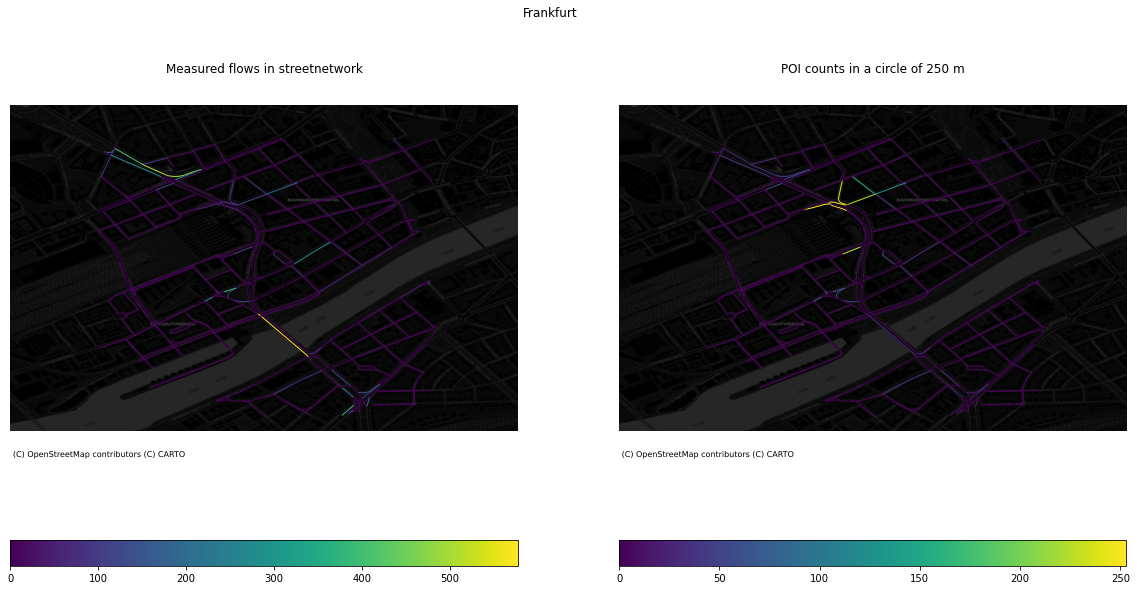

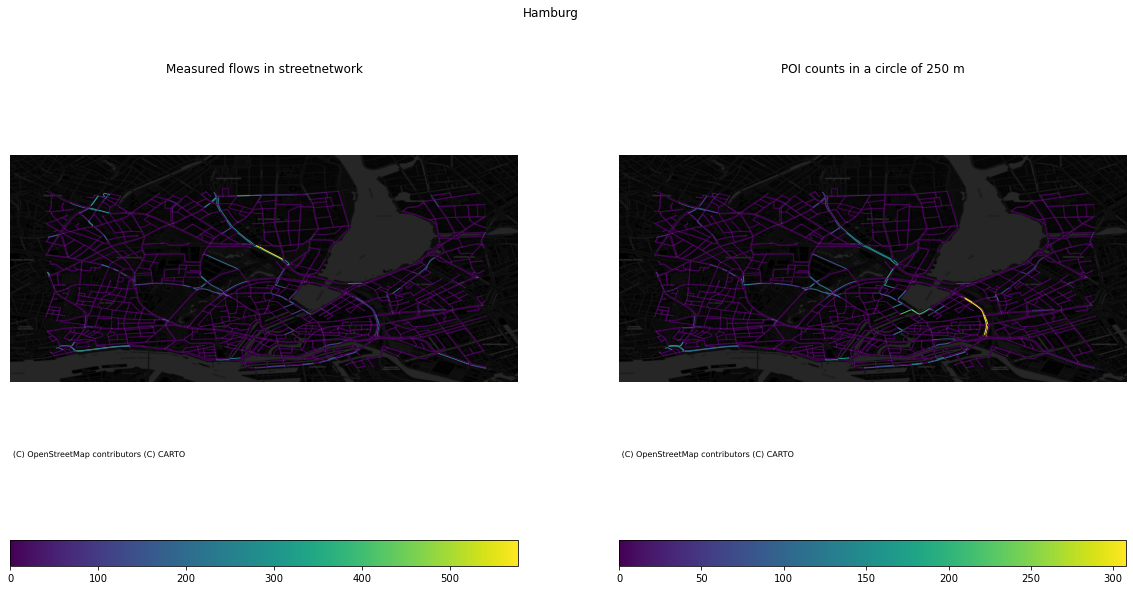

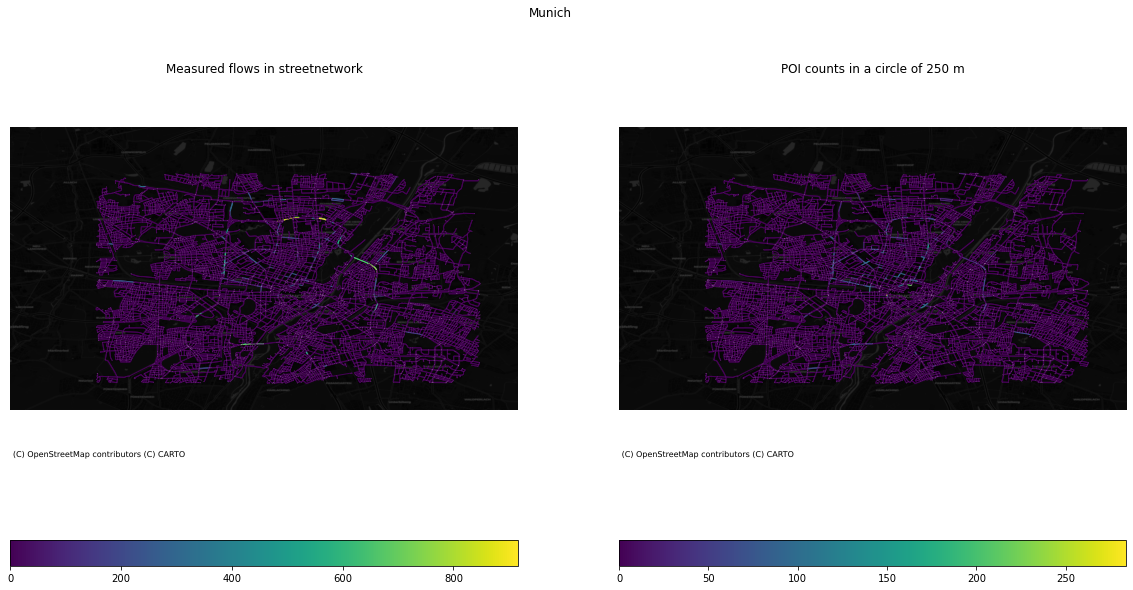

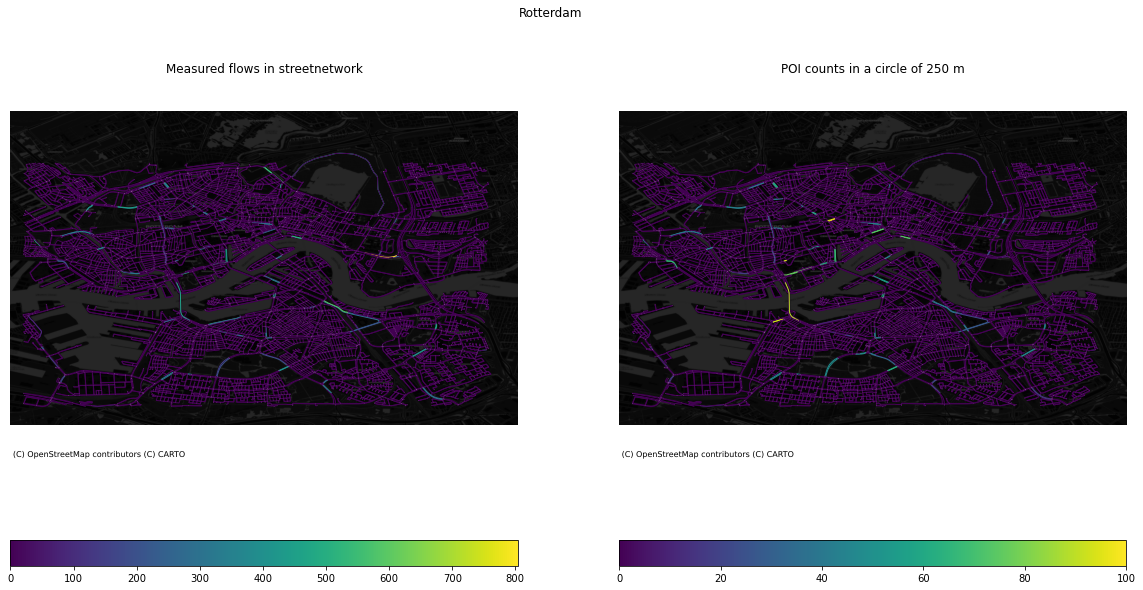

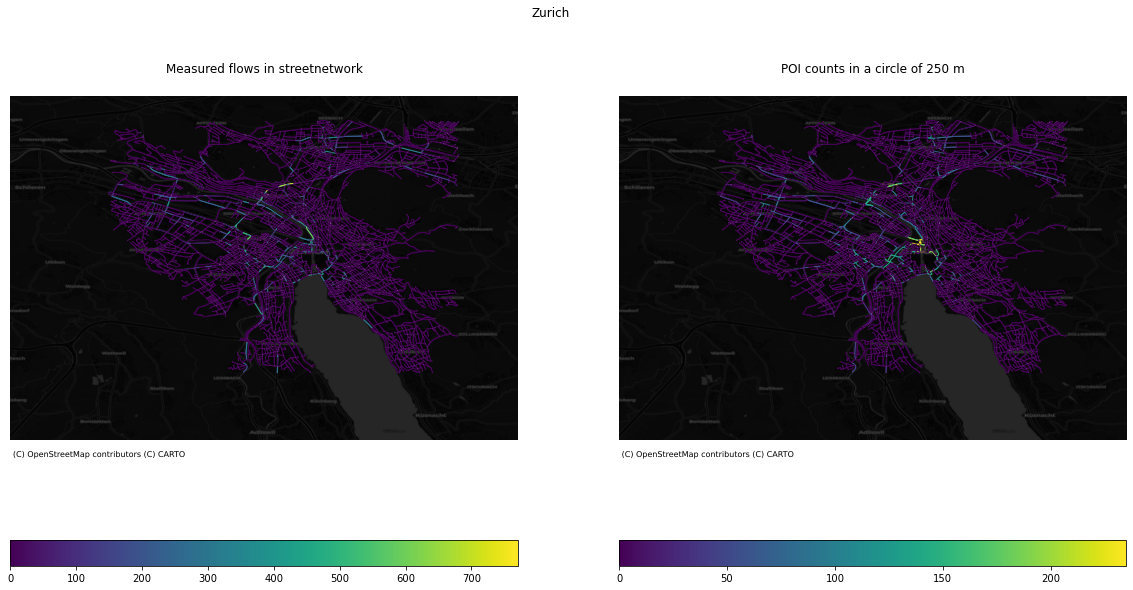

In [140]:
EdgeDict = {'rotterdam':R ,'zurich': Z,'munich':M, 'frankfurt':F, 'hamburg':H}

def CreatePlots(GList, PDict, Clist = UTD19Cities.citycode.unique(), flowdict = EdgeDict): 
    # need to run UTD19Cities, GetGraphs and need the POIS Dic
    for number,city in enumerate(Clist):
        GraphCity = GList[number]
        # plot build enviroment vs traffic flows 
        #pois = PDict[city]
        #pois['x'] = pois.geometry.centroid.x
        #pois['y'] = pois.geometry.centroid.y
        
        N_d, remove = ox.graph_to_gdfs(GraphCity)
        Edge_df = flowdict[city] # retrieve edge data
        Edge_df['flow'] = Edge_df.flow.fillna(0) # necessary for plotting colors
        Edge_df['CountNeigh'] = Edge_df.CountNeigh.fillna(0) 
        New = ox.graph_from_gdfs(N_d, Edge_df, graph_attrs={'edge_attr': ['detid', 'flow', 'CountNeigh']} )
        New.graph['crs'] = GraphCity.graph['crs']

        # setup plot
        f, (ax1, ax2) = plt.subplots(1,2 ,figsize = (20,10))
        f.suptitle(city.capitalize())
        # subplot 1
        color_map = copy.copy(plt.cm.get_cmap('viridis'))
        color_map.set_under('lightgrey')
        ec = ox.plot.get_edge_colors_by_attr(New, attr='flow', cmap= color_map) # set color scale by atribute (now length could be any other variable)
        z = ox.plot_graph(New, edge_color= ec, node_size=0.1, ax =ax1, show = False, close = False) # edgecolor is stored in ec
        cx.add_basemap(ax1, crs=New.graph['crs'],source=cx.providers.CartoDB.DarkMatter)
        ax1.axis('equal')
        ax1.set_title('Measured flows in streetnetwork')
        #x = np.array(Edge_df['flow']).reshape(-1,)
        norm=plt.Normalize(vmin=Edge_df['flow'].min(), vmax=Edge_df['flow'].max())
        sm = plt.cm.ScalarMappable(norm=norm, cmap=color_map)
        sm.set_array([])
        plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), ax=ax1, orientation='horizontal')
        #plt.colorbar(, ax=ax1)
        
        # subplot 2
        #reversed_color_map = color_map.reversed()
        c = ox.plot.get_edge_colors_by_attr(New, attr='CountNeigh', cmap = color_map)
        x = ox.plot_graph(New, edge_color= c, node_size=0.1, ax =ax2, show = False, close = False) # edgecolor is stored in ec
        cx.add_basemap(ax2, crs=New.graph['crs'],source=cx.providers.CartoDB.DarkMatter)
        ax2.set_title('POI counts in a circle of 250 m')
        ax2.axis('equal')
        norm=plt.Normalize(vmin=Edge_df['CountNeigh'].min(), vmax=Edge_df['CountNeigh'].max())
        sm = plt.cm.ScalarMappable(norm=norm, cmap=color_map)
        sm.set_array([])
        plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=color_map), ax=ax2, orientation='horizontal')
 
        
%time CreatePlots(Graphs, poi_dic)

# OLS

In [30]:
Total = gpd.GeoDataFrame()
for i in RegDf.keys():
    ThisOne = RegDf[i]
    w = weights.distance.DistanceBand.from_dataframe(ThisOne, threshold = 250, ids='detid')
    w.transform = 'R'
    ThisOne['Lag_Flow'] = weights.lag_spatial(w, ThisOne['flow'])
    
    Total = Total.append(ThisOne, ignore_index=True)

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 61 disconnected components.
 There are 2 islands with ids: GRT02_MORO_1277_2_2, GRT02_MORO_1277_2_1.
  warnings.warn(message)
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 68 disconnected components.
 There are 4 islands with ids: 10599001, 10926001, 10939003, 10161005.
  warnings.warn(message)


('WARNING: ', 'GRT02_MORO_1277_2_2', ' is an island (no neighbors)')
('WARNING: ', 'GRT02_MORO_1277_2_1', ' is an island (no neighbors)')
('WARNING: ', '10599001', ' is an island (no neighbors)')
('WARNING: ', '10926001', ' is an island (no neighbors)')
('WARNING: ', '10939003', ' is an island (no neighbors)')
('WARNING: ', '10161005', ' is an island (no neighbors)')
('WARNING: ', 'K123D21', ' is an island (no neighbors)')
('WARNING: ', 'K34D11', ' is an island (no neighbors)')
('WARNING: ', 'K446D14', ' is an island (no neighbors)')
('WARNING: ', 'K35D3.1', ' is an island (no neighbors)')
('WARNING: ', 'K148D3.5', ' is an island (no neighbors)')
('WARNING: ', 'K942D2.1', ' is an island (no neighbors)')


C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 61 disconnected components.
 There are 3 islands with ids: K123D21, K34D11, K446D14.
  warnings.warn(message)
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 27 disconnected components.
 There are 3 islands with ids: K35D3.1, K148D3.5, K942D2.1.
  warnings.warn(message)
C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [31]:
Total

,detid,flow,City,geometry,NeighboursTotal,station,cycleway,footway,pedestrian,footwayplatform,Lag_Flow
0,GRT02_MORO_1811_2_1,392.931968,rotterdam,POINT (-409627.897 114878.047),45.0,0,19,24,2,0.0,352.676664
1,GRT02_MORO_1822_2_1,339.342356,rotterdam,POINT (-408094.756 114817.516),17.0,0,9,8,0,0.0,340.167520
2,GRT02_MORO_1293_2_1,385.277249,rotterdam,POINT (-413618.789 120024.077),57.0,0,19,32,6,0.0,307.186174
3,GRT02_MORO_1293_2_2,280.088515,rotterdam,POINT (-413618.789 120024.077),57.0,0,19,32,6,0.0,307.186174
4,GRT02_MORO_1851_2_1,342.891002,rotterdam,POINT (-411548.145 113917.160),16.0,0,4,12,0,0.0,229.296342
...,...,...,...,...,...,...,...,...,...,...,...
2325,STA2_D4(KFZ4),70.794979,frankfurt,POINT (-130952.381 -98513.752),32.0,0,2,30,0,NaN,228.490074
2326,STA1_D1(KFZ4),514.000000,frankfurt,POINT (-130978.227 -98382.916),30.0,0,2,28,0,NaN,199.996146
2327,STA1_D2(KFZ4),576.708333,frankfurt,POINT (-130981.138 -98384.956),30.0,0,2,28,0,NaN,193.725312
2328,STA1_D9(KFZ5),99.855596,frankfurt,POINT (-130941.286 -98365.248),30.0,0,2,28,0,NaN,241.410586


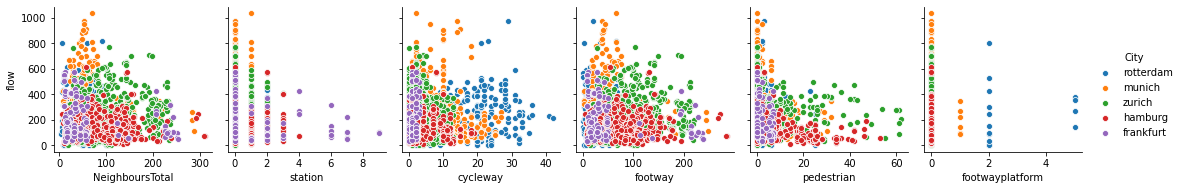

In [289]:
roffa = RegDf['rotterdam']
sns.pairplot(Total,
             x_vars=['NeighboursTotal', 'station','cycleway','footway', 'pedestrian','footwayplatform'], 
             y_vars = ['flow'],
            hue = 'City')

<AxesSubplot:ylabel='flow'>

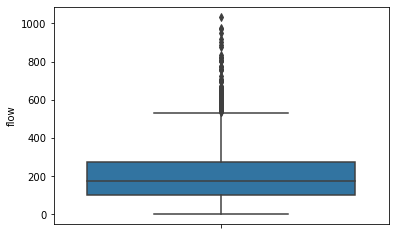

In [294]:
sns.boxplot(y = 'flow', data = Total)

In [255]:
roffa = RegDf['rotterdam']
regression(roffa['flow'], roffa['NeighboursTotal'], roffa)

Shape of the training set is (207, 10) and of the testing set is (52, 10).


KeyError: "None of [Float64Index([ 392.9319678127286,  339.3423555230432,  385.2772494513533,\n               280.0885149963424,  342.8910021945867, 28.040234089246525,\n              236.56547183613753,  502.4264813460132,  379.6349670811997,\n                93.2781693587862,\n              ...\n               472.8127286027798, 179.25822970007314,  207.3643013899049,\n                356.936356986101, 415.94220921726406, 446.29114850036575,\n              137.20775420629116,  358.0950987564009,  535.5888807607901,\n              216.77542062911485],\n             dtype='float64', length=259)] are in the [columns]"